In [ ]:
pip install plotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from datetime import datetime

from plotting import *
 
#workdir = os.path.dirname("Tweets.csv")
#sys.path.append(workdir)  # append path of project folder directory



In [ ]:
# IMPORT DATA TWEETS: Airlines
df_tweets_air_full = pd.read_csv("Tweets.csv")
df_selected = df_tweets_air_full[['airline_sentiment', 'tweet_location', 'airline']]

In [ ]:
# abbreviate Airline names
df_selected['airline'].replace({"Virgin America": "Virgin"}, inplace=True)
df_selected['airline'].replace({"Southwest": "Southw."}, inplace=True)
df_selected['airline'].replace({"US Airways": "US Airw."}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_neg = df_selected[df_selected['airline_sentiment'] == 'negative']
df_ntr = df_selected[df_selected['airline_sentiment'] == 'neutral']
df_pos = df_selected[df_selected['airline_sentiment'] == 'positive']
print(df_selected.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   tweet_location     9907 non-null   object
 2   airline            14640 non-null  object
dtypes: object(3)
memory usage: 343.2+ KB
None 



In [ ]:
tweet_counts = df_selected['airline'].value_counts()
tweets_amount = len(df_selected)
print(f"TOTAL    tweet count: {tweets_amount}")
print(f"negative tweet count: {len(df_neg)}")
print(f"neutral  tweet count: {len(df_ntr)}")
print(f"positive tweet count: {len(df_pos)}")


TOTAL    tweet count: 14640
negative tweet count: 9178
neutral  tweet count: 3099
positive tweet count: 2363


In [ ]:
print("\n", tweet_counts, "\n")



 United      3822
US Airw.    2913
American    2759
Southw.     2420
Delta       2222
Virgin       504
Name: airline, dtype: int64 



In [ ]:
dict_air = []
airlines = list(df_selected['airline'].unique())

for airline in airlines:  # calculate distribution of tweet data among airlines
    tweet_count = list(df_selected['airline']).count(airline)
    tweet_percentage = round(tweet_count/tweets_amount, 4)
    count_neg = list(df_neg['airline']).count(airline)
    count_ntr = list(df_ntr['airline']).count(airline)
    count_pos = list(df_pos['airline']).count(airline)

    dict_air.append({'airline_name': airline,
                     'tweet_count': tweet_count,
                     'percentage': tweet_percentage,
                     'count_neg': count_neg,
                     'count_ntr': count_ntr,
                     'count_pos': count_pos})


In [ ]:
#DEFINE PLOT CHARACTERISTICS
width = 3.487
height = width / 1.618
resolution = 500
accent_color = '#808000'
tum_blue = '#3070b3'


In [ ]:
def plot_sentiment_distribution(dict_air):

    plt.rc('xtick', labelsize=8)
    plt.rc('ytick', labelsize=8)
    plt.rc('legend', fontsize=8)
    plt.rc('axes', labelsize=10)

    fig = plt.figure(dpi=500, figsize=(width, height))
    ax = fig.add_subplot(111)

    colors_ = ['azure', 'powderblue', 'mediumturquoise', 'teal', 'cadetblue', 'darkslategrey']

    airlines, tweet_counts = [], []
    for index in range(len(dict_air)):
        airlines.append(dict_air[index]['airline_name'])
        tweet_counts.append(dict_air[index]['tweet_count'])

    wedges, texts, _ = ax.pie(tweet_counts, colors=colors_, wedgeprops=dict(width=0.5),
                              startangle=-40, autopct="%.2f%%", textprops={'fontsize': 8, 'weight': 'bold'})

    #bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizont_align = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(airlines[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizont_align, fontsize=10, **kw)

    fig.tight_layout()
    time_of_analysis = str(datetime.now().strftime("%Y-%m-%d %H-%M-%S"))
    #fig.savefig(f"{workdir}/analysis_plots/fundamental_donut_{time_of_analysis}.png")
    plt.show()


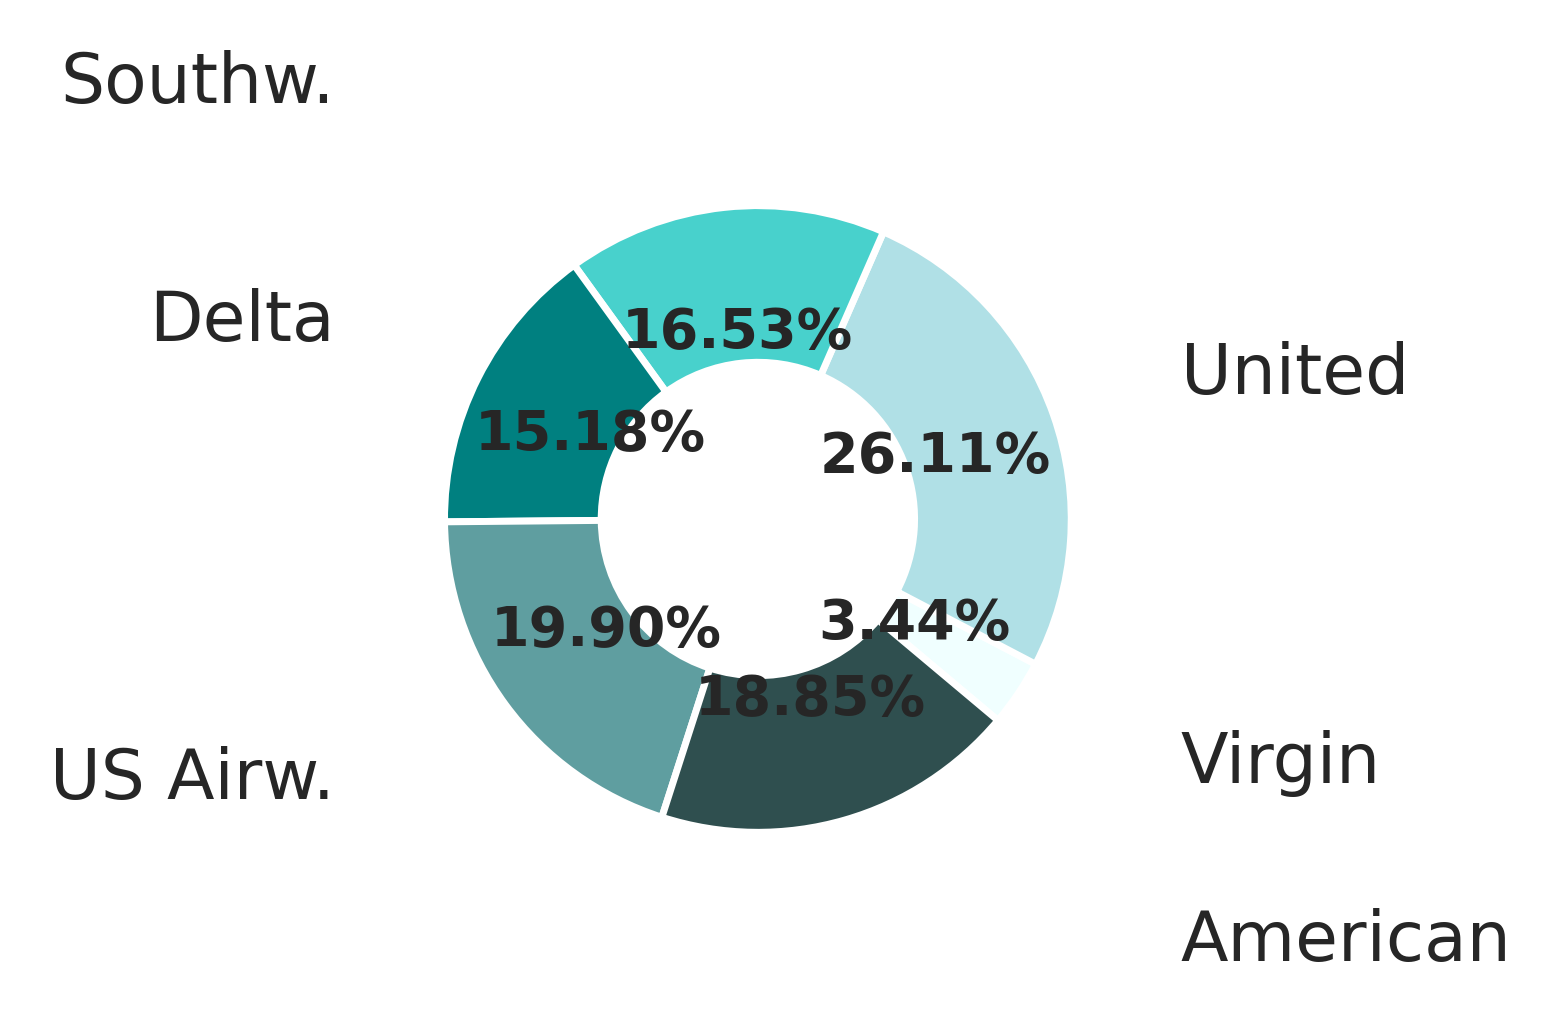

In [ ]:
# plot_tweet_distribution(dict_air)
plot_sentiment_distribution(dict_air)

In [ ]:
def plot_tweet_distribution(dict_air):

    plt.rc('xtick', labelsize=8)
    plt.rc('ytick', labelsize=8)
    plt.rc('legend', fontsize=8)
    plt.rc('axes', labelsize=10)

    fig = plt.figure(dpi=500, figsize=(width, width))
    ax = fig.add_subplot(111)

    airlines, arr_neg, arr_ntr, arr_pos = [], [], [], []
    for index in range(len(dict_air)):
        airlines.append(dict_air[index]['airline_name'])
        arr_neg.append(dict_air[index]['count_neg'])
        arr_ntr.append(dict_air[index]['count_ntr'])
        arr_pos.append(dict_air[index]['count_pos'])

    print(airlines)
    print("neg tweet counts: ", arr_neg)
    print("ntr tweet counts: ", arr_ntr)
    print("pos tweet counts: ", arr_pos)
    x_pos = np.arange(len(airlines))
    x_pos = x_pos - 1
    x_pos_shift1 = [x+0.25 for x in x_pos]
    x_pos_shift2 = [x+0.5 for x in x_pos]

    ax.bar(x_pos_shift2, arr_pos, align="center", width=0.25, color='darkturquoise',
           label=f" {sum(arr_pos)} positive tweets", edgecolor='black')
    ax.bar(x_pos_shift1, arr_ntr, align="center", width=0.25, color='azure',
           label=f" {sum(arr_ntr)} neutral tweets", edgecolor='black')
    ax.bar(x_pos, arr_neg, align="center", width=0.25, color='teal',
           label=f" {sum(arr_neg)} negative tweets", edgecolor='black')

    ax.set_xlabel("Airlines in the data set")
    ax.set_ylabel("Amount of tweets")
    ax.legend()
    ax.set_ylim(0, 3000)
    ax.grid(axis='y', linestyle='--', color="lightgrey", linewidth=0.5)

    ax.set_xticks(x_pos_shift1)   # define custom ticks
    ax.set_xticklabels(airlines)  # name custom tick labels
    ax.xaxis.set_tick_params(rotation=30)

    fig.tight_layout()
    time_of_analysis = str(datetime.now().strftime("%Y-%m-%d %H-%M-%S"))
    #fig.savefig(f"{workdir}/analysis_plots/fundamental_analysis_{time_of_analysis}.png")
    fig.show()



['Virgin', 'United', 'Southw.', 'Delta', 'US Airw.', 'American']
neg tweet counts:  [181, 2633, 1186, 955, 2263, 1960]
ntr tweet counts:  [171, 697, 664, 723, 381, 463]
pos tweet counts:  [152, 492, 570, 544, 269, 336]


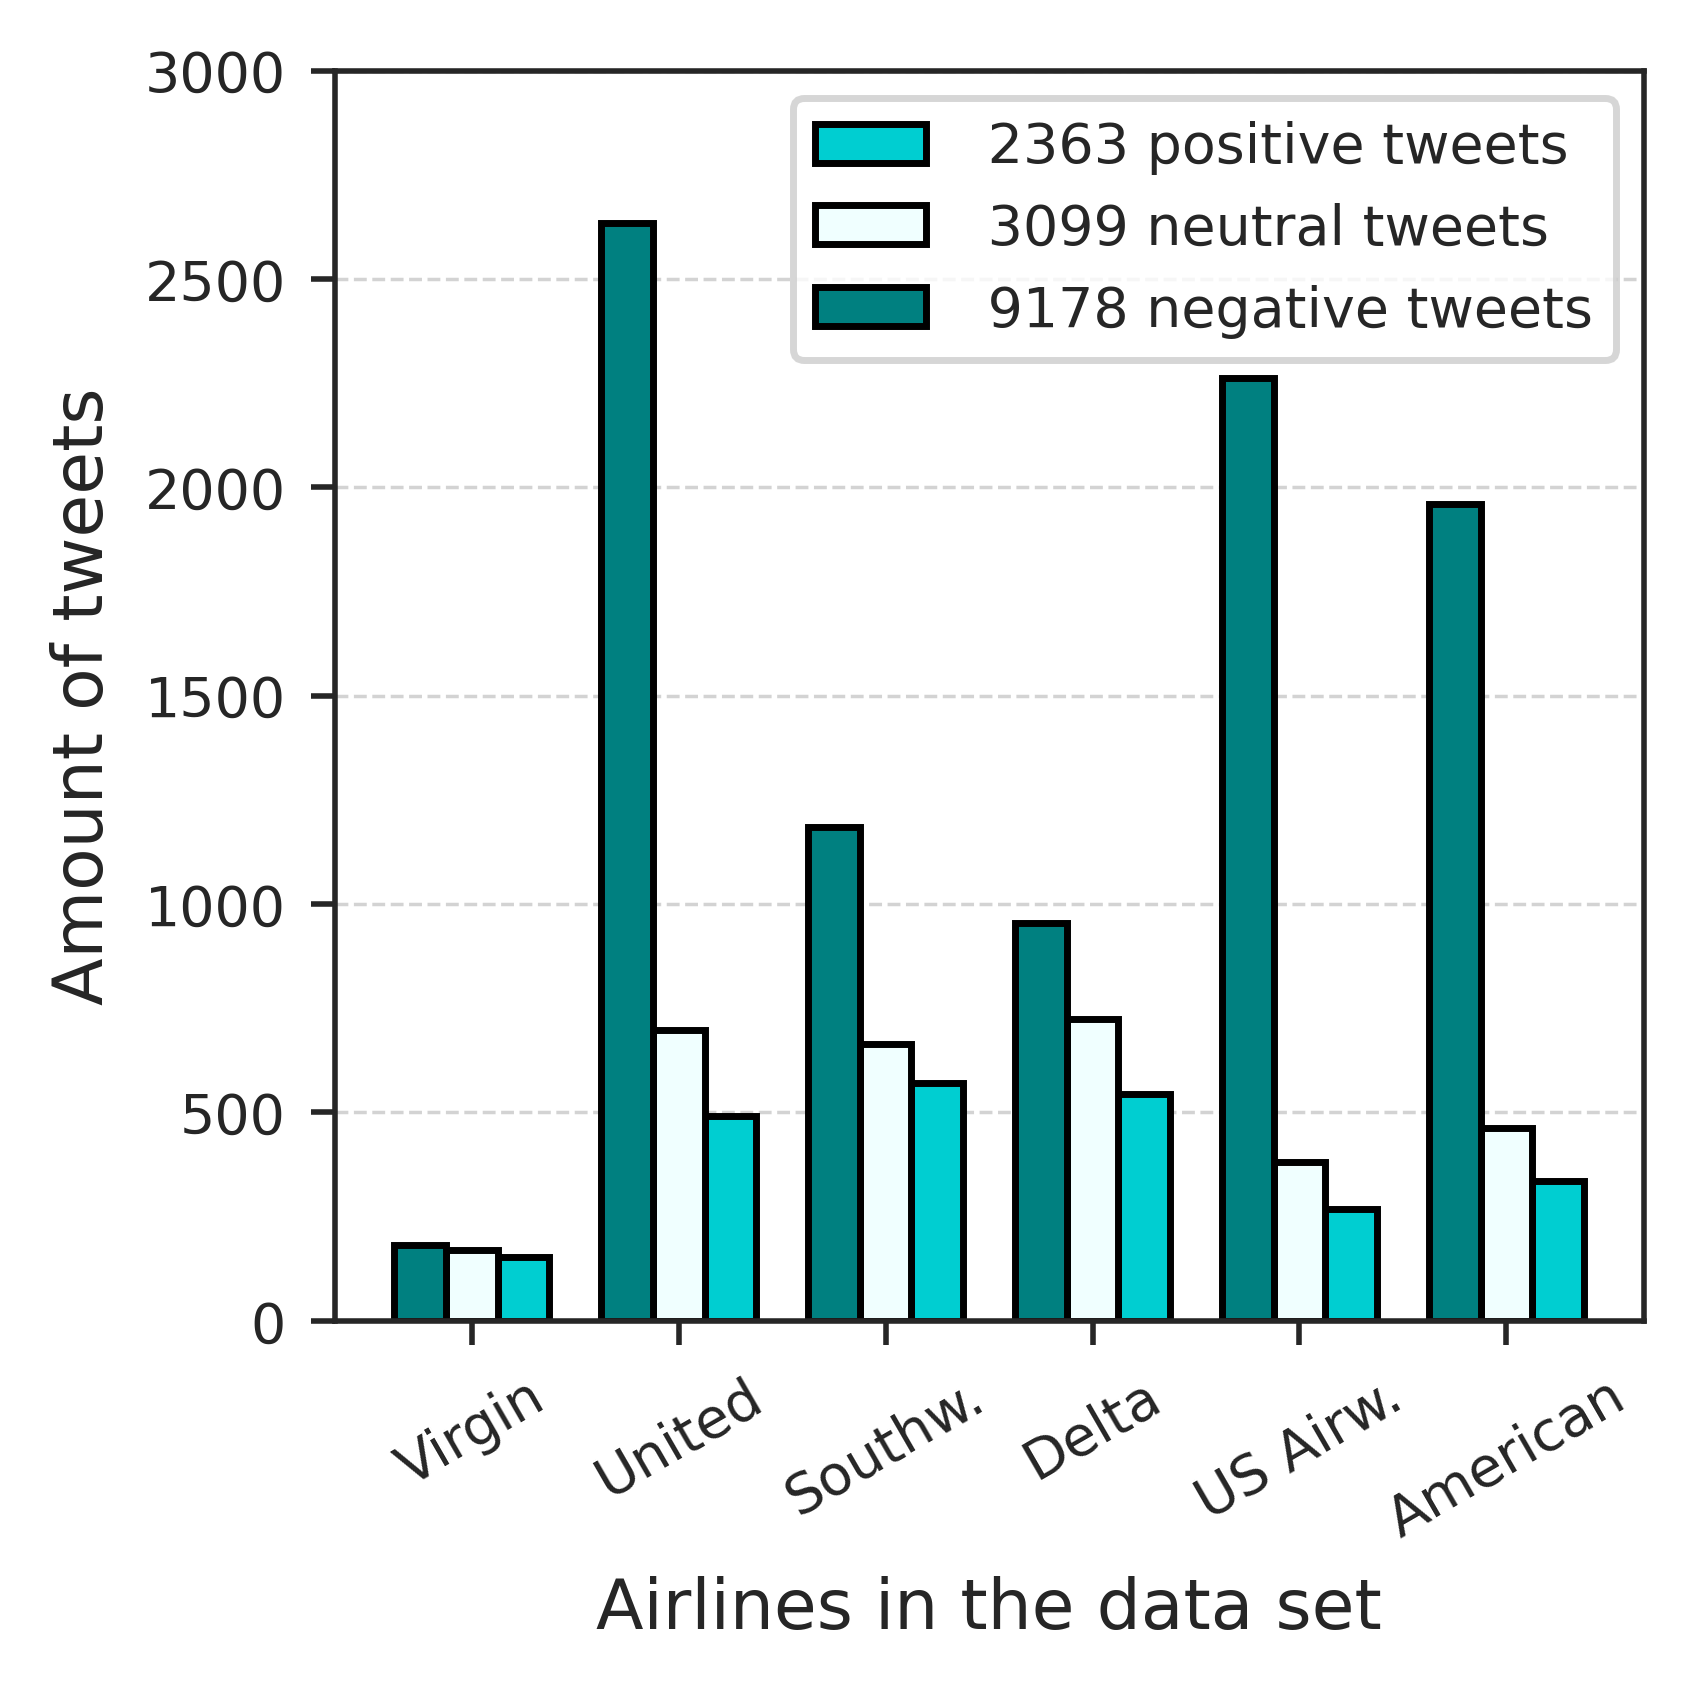

In [ ]:
plot_tweet_distribution(dict_air)